In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.tools as tls
%matplotlib inline

In [2]:
data = pd.read_csv('National_Stock_Exchange_of_India_Ltd.csv')
data.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


In [3]:
data.shape

(50, 13)

# Columns Informations

symobol = stocks names of nifty 50
Open=Open price for current day
High=Price made high for current day
Low=Price made low for current day
Chng=Change in rupees
% Chng=Percentage of change from previous day close
Volume (lacs)=Traded volume
Turnover (crs.)=Turnover
52w H=Stock 52 week high price
52w L=Stock 52 week high price
365 d % chng=Stock price percentage change from one year
30 d % chng=Stock price percentage change from last 30days

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            50 non-null     object 
 10  52w L            50 non-null     object 
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(5), object(8)
memory usage: 5.2+ KB


In [6]:
#Changing the columns type to float
col = data.columns
for i in col:
    if i!='Symbol':
        if data[i].dtype =='object':
            data[i] = data[i].str.replace(',','').astype('float32')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     float32
 2   High             50 non-null     float32
 3   Low              50 non-null     float32
 4   LTP              50 non-null     float32
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     float32
 9   52w H            50 non-null     float32
 10  52w L            50 non-null     float32
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float32(7), float64(5), object(1)
memory usage: 3.8+ KB


In [8]:
data.isnull().sum()

Symbol             0
Open               0
High               0
Low                0
LTP                0
Chng               0
% Chng             0
Volume (lacs)      0
Turnover (crs.)    0
52w H              0
52w L              0
365 d % chng       0
30 d % chng        0
dtype: int64

# Top 10 gainers from last one year

In [9]:
new = data.sort_values('365 d % chng',ascending=False).head(10)
new_final = new[['Symbol','365 d % chng']]
new_final

,Symbol,365 d % chng
42,TATAMOTORS,167.95
43,TATASTEEL,105.13
14,GRASIM,99.95
38,SBIN,93.42
4,BAJAJFINSV,91.38
20,HINDALCO,86.93
27,JSWSTEEL,86.25
34,ONGC,82.86
0,ADANIPORTS,79.22
49,WIPRO,77.51


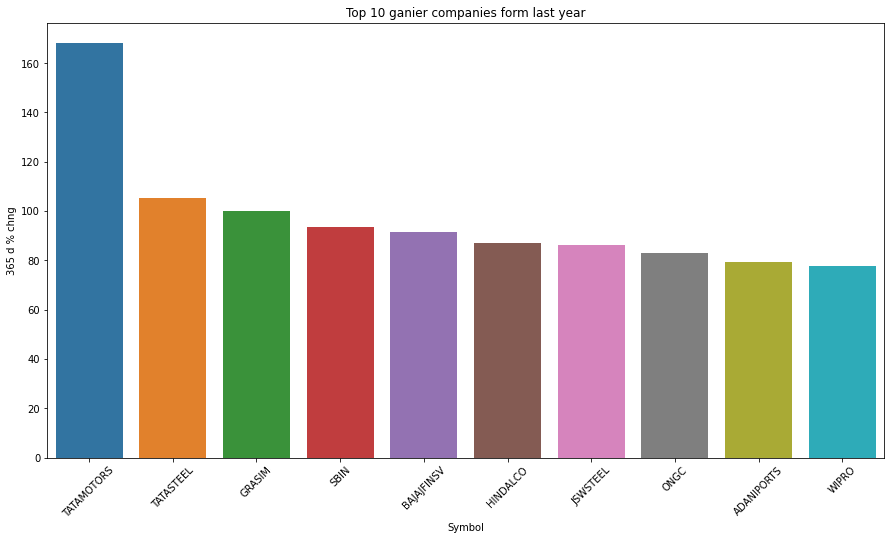

In [12]:
plt.figure(figsize=(15,8))
sns.barplot(x='Symbol',y='365 d % chng',data=new_final)
plt.title("Top 10 ganier companies form last year")
plt.xticks(rotation=45)
plt.show()

# Top losers from last one year

In [13]:
new = data.sort_values('365 d % chng',ascending=True).head(10)
new_loosers = new[['Symbol','365 d % chng']]
new_loosers

,Symbol,365 d % chng
19,HEROMOTOCO,-16.02
13,EICHERMOT,-5.95
7,BPCL,-1.22
12,DRREDDY,-1.17
8,BRITANNIA,0.30
18,HDFCLIFE,0.70
31,MARUTI,1.34
35,POWERGRID,3.69
28,KOTAKBANK,5.24
23,INDUSINDBK,5.25


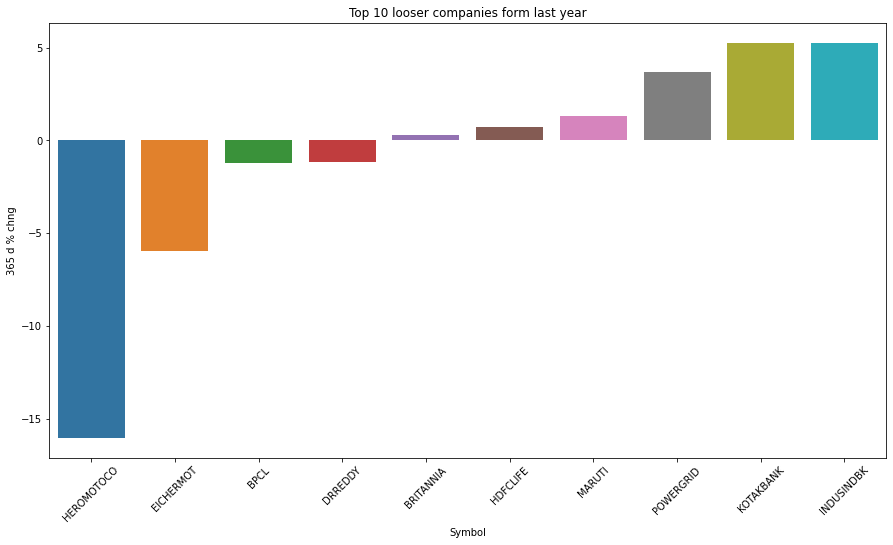

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x='Symbol',y='365 d % chng',data=new_loosers)
plt.title("Top 10 looser companies form last year")
plt.xticks(rotation=45)
plt.show()

# Top 5 gainers in a month

In [15]:
t5=data[data['30 d % chng']>0].head(5)
t_5=t5.sort_values('30 d % chng',ascending=False)
t_5[['Symbol','30 d % chng']].head(5)

,Symbol,30 d % chng
9,CIPLA,6.34
6,BHARTIARTL,5.70
1,ASIANPAINT,5.66
12,DRREDDY,1.80
32,NESTLEIND,0.17


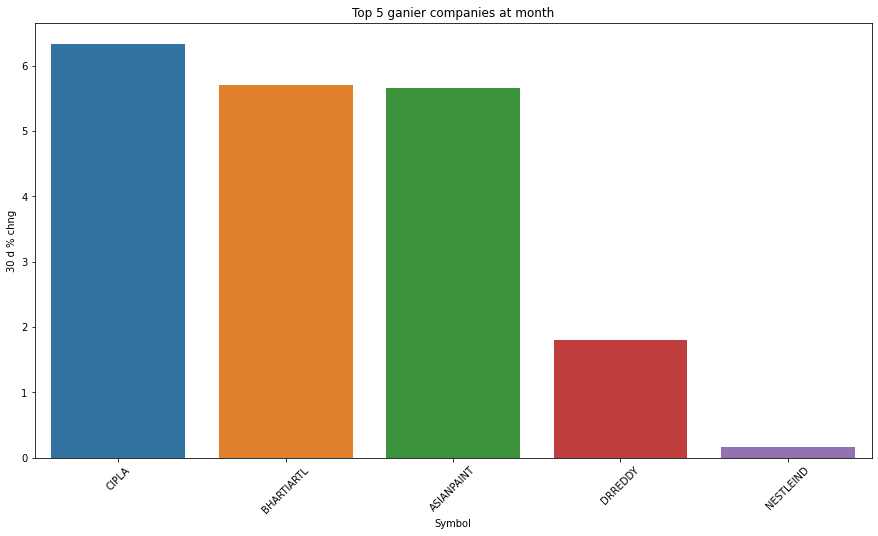

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x='Symbol',y='30 d % chng',data=t_5)
plt.title("Top 5 ganier companies at month")
plt.xticks(rotation=45)
plt.show()

In [17]:
l5=data[data['30 d % chng']<0].head(5)
l_5=l5.sort_values('30 d % chng',ascending=False)
l_5[['Symbol','30 d % chng']].head(5)

,Symbol,30 d % chng
0,ADANIPORTS,-4.65
4,BAJAJFINSV,-9.10
3,BAJAJ-AUTO,-12.05
5,BAJFINANCE,-13.69
2,AXISBANK,-21.49


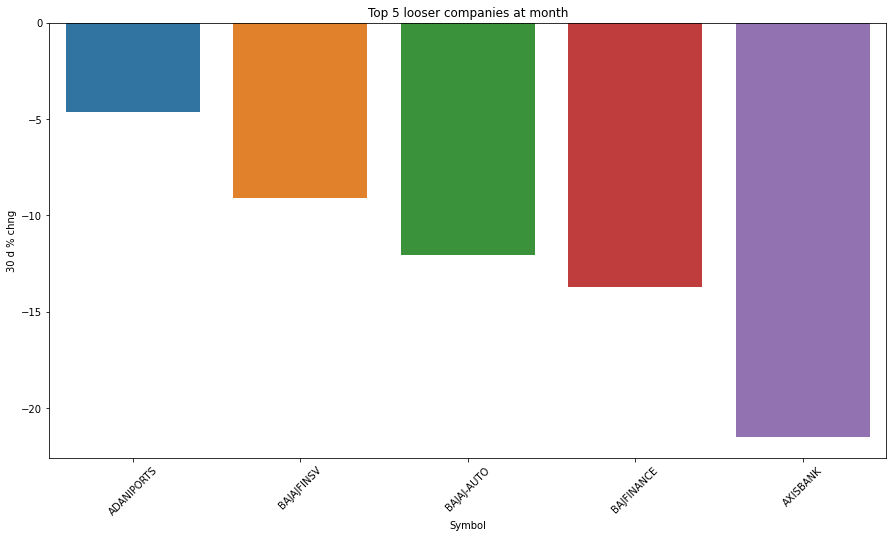

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x='Symbol',y='30 d % chng',data=l_5)
plt.title("Top 5 looser companies at month")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Axis Bank is top looser in a month with almost -20 peracentage

In [19]:
data.sort_values('Turnover (crs.)',ascending = False).head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
42,TATAMOTORS,486.000000,486.750000,458.000000,459.399994,-33.35,-6.77,517.88,2430.360107,536.700012,156.699997,167.95,-9.68
36,RELIANCE,2467.800049,2477.600098,2401.500000,2405.100098,-87.85,-3.52,72.75,1770.189941,2751.350098,1830.000000,23.48,-9.62
17,HDFCBANK,1500.000000,1506.699951,1485.000000,1489.500000,-36.45,-2.39,93.12,1394.099976,1725.000000,1342.000000,6.18,-9.88
22,ICICIBANK,739.000000,742.049988,718.599976,720.450012,-30.60,-4.07,189.88,1385.859985,867.000000,465.799988,52.41,-13.14
9,CIPLA,892.000000,976.049988,890.650024,965.000000,65.05,7.23,144.59,1380.900024,1005.000000,726.500000,31.89,6.34


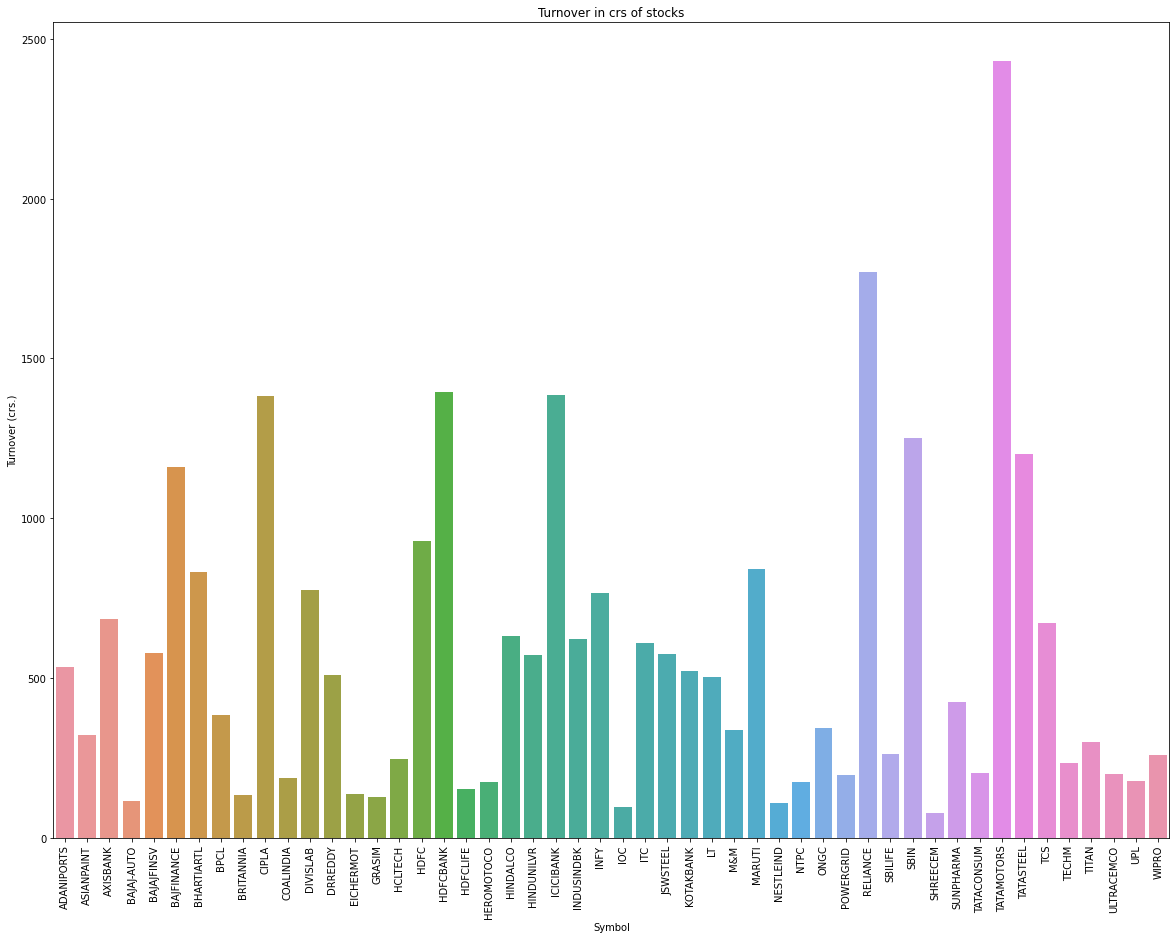

In [23]:
plt.figure(figsize=(20,15))
sns.barplot(x=data['Symbol'], y=data['Turnover (crs.)'])
plt.title("Turnover in crs of stocks")
plt.xticks(rotation=90)
plt.show()

# Top 10 stocks in which highest volume traded

In [24]:
data.sort_values('Volume (lacs)',ascending = False).head(10)

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
42,TATAMOTORS,486.000000,486.750000,458.000000,459.399994,-33.35,-6.77,517.88,2430.360107,536.700012,156.699997,167.95,-9.68
26,ITC,228.899994,230.050003,223.100006,223.600006,-7.70,-3.33,270.27,610.539978,265.299988,192.399994,15.35,-5.53
38,SBIN,486.250000,487.899994,467.100006,470.000000,-20.55,-4.19,263.06,1249.550049,542.299988,240.149994,93.42,-8.30
34,ONGC,152.250000,152.250000,146.250000,147.750000,-7.35,-4.74,231.36,344.329987,172.750000,77.050003,82.86,-9.41
22,ICICIBANK,739.000000,742.049988,718.599976,720.450012,-30.60,-4.07,189.88,1385.859985,867.000000,465.799988,52.41,-13.14
20,HINDALCO,441.799988,442.700012,414.700012,417.700012,-29.35,-6.57,148.26,631.929993,551.849976,220.350006,86.93,-14.06
9,CIPLA,892.000000,976.049988,890.650024,965.000000,65.05,7.23,144.59,1380.900024,1005.000000,726.500000,31.89,6.34
33,NTPC,133.199997,134.050003,128.000000,128.649994,-6.55,-4.84,133.24,173.940002,152.100006,88.150002,36.93,-10.16
10,COALINDIA,157.750000,159.399994,155.350006,155.899994,-2.65,-1.67,118.30,185.500000,203.800003,123.250000,25.78,-10.94
6,BHARTIARTL,763.000000,763.000000,733.099976,735.849976,-29.30,-3.83,111.43,830.059998,781.799988,454.109985,58.55,5.70


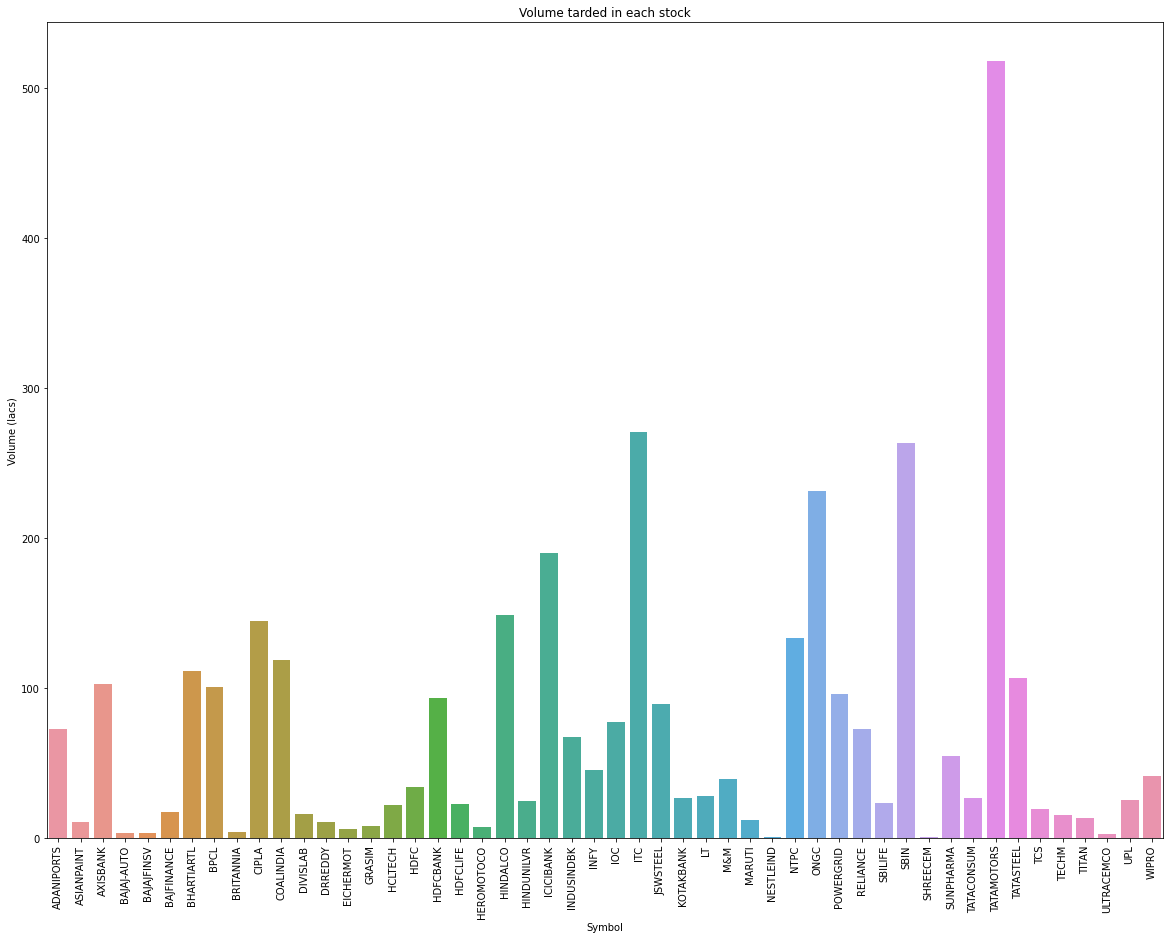

In [25]:
plt.figure(figsize=(20,15))
sns.barplot(x=data['Symbol'], y=data['Volume (lacs)'])
plt.title("Volume tarded in each stock")
plt.xticks(rotation=90)
plt.show()